In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
# 1. Description
print("Description of the data set.")
print("petal_length - длина лепестка")
print("petal_width - ширина лепестка")
print("sepal_length - длина чашелистика")
print("sepal_width - ширина чашелистика")
print("species - вид")

Description of the data set.
petal_length - длина лепестка
petal_width - ширина лепестка
sepal_length - длина чашелистика
sepal_width - ширина чашелистика
species - вид


In [4]:
# 2. Delete dublicates
iris_arr = []
with open("iris.txt", "r") as iris_data:
    for i in range(0,151):
        iris_arr.append(iris_data.readline().replace("\n",""))
print("The number of records before checking for repeats: " + str(len(iris_arr)-1) + '\n')

wo_duplicates = []
for i in range(len(iris_arr)-1):
    for j in range(i+1,len(iris_arr)):
        if (iris_arr[i] == iris_arr[j]):
            print("Duplicates find!")
            print('\t' + iris_arr[i] + ' | index: ' + str(i))
            print('\t' + iris_arr[j] + ' | index: ' + str(j))
            print()
            iris_arr[i] = " "

for i in range (len(iris_arr)-1):
    if(iris_arr[i] != " "):
        wo_duplicates.append(iris_arr[i])

print("The number of records after checking for repeats: " + str(len(wo_duplicates)))
iris_to_csv = [wo_duplicates[i].split(',') for i in range(len(wo_duplicates))]

columns = ["sepal_length","sepal_width","petal_length","petal_width", "species"]
data = iris_to_csv
iris_df = pd.DataFrame(iris_to_csv, columns=columns)
iris_df.to_csv("iris.csv")


The number of records before checking for repeats: 150

Duplicates find!
	4.9,3.1,1.5,0.1,Iris-setosa | index: 9
	4.9,3.1,1.5,0.1,Iris-setosa | index: 34

Duplicates find!
	4.9,3.1,1.5,0.1,Iris-setosa | index: 34
	4.9,3.1,1.5,0.1,Iris-setosa | index: 37

Duplicates find!
	5.8,2.7,5.1,1.9,Iris-virginica | index: 101
	5.8,2.7,5.1,1.9,Iris-virginica | index: 142

The number of records after checking for repeats: 147


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


<BarContainer object of 3 artists>

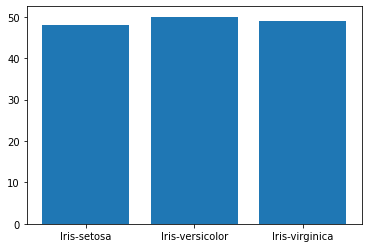

In [5]:
# 3. Histogram
iris = pd.read_csv("iris.csv")
del iris["Unnamed: 0"]

iris.info()

groups_names = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
setosa_amount = iris[iris["species"] == "Iris-setosa"].value_counts().sum()
versicolor_amount = iris[iris["species"] == "Iris-versicolor"].value_counts().sum()
virginica_amount = iris[iris["species"] == "Iris-virginica"].value_counts().sum()
plt.bar(groups_names,[setosa_amount,versicolor_amount,virginica_amount])


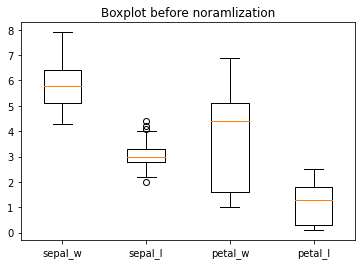

In [6]:
# 4. Normalization
sepal_length = iris["sepal_length"]
sepal_width = iris["sepal_width"]
petal_length = iris["petal_length"]
petal_width = iris["petal_width"]

# boxplot before mormalization
plt.title("Boxplot before noramlization")
plt.boxplot([sepal_length, sepal_width, petal_length, petal_width])
plt.xticks([1,2,3,4],["sepal_w", "sepal_l", "petal_w", "petal_l"])

sepal_w_norm = []
sepal_l_norm = []
petal_w_norm = []
petal_l_norm = []

for i in range (len(wo_duplicates)):
    x = (iris["sepal_length"][i] - iris["sepal_length"].min()) / (iris["sepal_length"].max() - iris["sepal_length"].min())
    sepal_w_norm.append(round(x, 2))
    x = (iris["sepal_width"][i] - iris["sepal_width"].min()) / (iris["sepal_width"].max() - iris["sepal_width"].min())
    sepal_l_norm.append(round(x, 2))
    x = (iris["petal_length"][i] - iris["petal_length"].min()) / (iris["petal_length"].max() - iris["petal_length"].min())
    petal_w_norm.append(round(x, 2))
    x = (iris["petal_width"][i] - iris["petal_width"].min()) / (iris["petal_width"].max() - iris["petal_width"].min())
    petal_l_norm.append(round(x, 2))
    
iris_norm = pd.DataFrame({
    "sepal_length" : sepal_l_norm,
    "sepal_width" : sepal_w_norm,
    "petal_length" : petal_l_norm,
    "petal_width" : petal_w_norm
})

([<matplotlib.axis.XTick at 0x26c80a1b1f0>,
 [Text(1, 0, 'sepal_w'),
  Text(2, 0, 'sepal_l'),
  Text(3, 0, 'petal_w'),
  Text(4, 0, 'petal_l')])

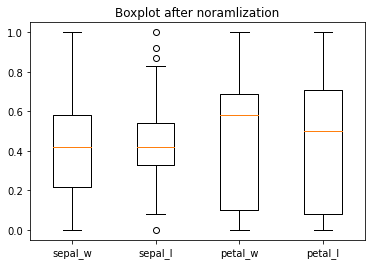

In [7]:
plt.title("Boxplot after noramlization")
plt.boxplot([sepal_w_norm, sepal_l_norm, petal_w_norm, petal_l_norm])
plt.xticks([1,2,3,4],["sepal_w", "sepal_l", "petal_w", "petal_l"])

In [8]:
# 6. Correlation
iris_norm.corr("pearson")

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.108184,-0.354792,-0.419645
sepal_width,-0.108184,1.000000,0.816632,0.871720
petal_length,-0.354792,0.816632,1.000000,0.961163
petal_width,-0.419645,0.871720,0.961163,1.000000


In [9]:
# 5. Replacement of categorical features
from sklearn import preprocessing
import numpy as np

iris_object = iris.select_dtypes(include=[object])

le = preprocessing.LabelEncoder()
iris_object_encoded = iris_object.apply(le.fit_transform)

iris_object_encoded.reset_index(drop=True,inplace=True)

iris_norm["species"] = iris_object_encoded
iris_norm

,sepal_length,sepal_width,petal_length,petal_width,species
0,0.62,0.22,0.04,0.07,0
1,0.42,0.17,0.04,0.07,0
2,0.50,0.11,0.04,0.05,0
3,0.46,0.08,0.04,0.08,0
4,0.67,0.19,0.04,0.07,0
...,...,...,...,...,...
142,0.42,0.67,0.92,0.71,2
143,0.21,0.56,0.75,0.68,2
144,0.42,0.61,0.79,0.71,2
145,0.58,0.53,0.92,0.75,2


In [10]:
# 7. NO MISSING VALUE

In [11]:
# 8 GridSearchCV, KNN, Dtree
# Data preparing
x = iris_norm.drop('species', axis=1)
y = iris_norm['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, shuffle=True)

Fitting 5 folds for each of 280 candidates, totalling 1400 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.92      0.92      0.92        26
           2       0.90      0.90      0.90        20

    accuracy                           0.95        74
   macro avg       0.94      0.94      0.94        74
weighted avg       0.95      0.95      0.95        74



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.97238095 0.97238095 0.97238095 0.97238095 1.         1.
 0.98666667 1.         0.98666667 0.98666667 0.98666667 0.98666667
 1.         1.         1.         0.98666667 0.98666667 0.98666667
 0.97333333 0.98666667 0.96       0.97333333 0.96       0.98666667
 0.97333333 0.98666667 0.96       0.98666667 0.93333333 0.97333333
 0.96       0.97333333 0.93333333 0.97333333 0.94666667 0.96
 0.94666667 0.96       0.94666667 0.96       0.94666667 0.96
 0.94666667 0.96       0.94666667 0.96       0.91904762 0.96
 0.93238095 0.96       0.91904762 0.96       0.91904762 0.94571429
 0.91904762 0.96       0.91904762 0.96       0.91904762 0.96
 0.9047619  0.94571429 0.89142857 0.97333333 0.80952381 0.94571429
 0.69809524 0.94571429 0.61714286 0.94571429 0.63047619 0.94571429
 0.60380952 0.94571429 0.60380952 0.95904762 0.54952381 0.95904762
 0.52190476 0.9590

Text(0.5, 1.0, 'Accuracy:0.946')

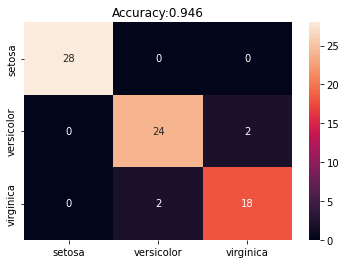

In [13]:
#KNN
grid_params = {
    'n_neighbors' : [i+1  for i in range(70)],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs_knn = GridSearchCV(KNeighborsClassifier(), grid_params,
                     verbose=1, cv=5, n_jobs=-1)
gs_knn_res = gs_knn.fit(x_train, y_train)

#print(gs_knn_res.best_score_)
#print(gs_knn_res.best_estimator_)
#print(gs_knn_res.best_params_)

y_pred_knn = gs_knn_res.predict(x_test)

print(classification_report(y_test, y_pred_knn))

df_knn = pd.DataFrame(confusion_matrix(y_test, y_pred_knn),
                        index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(df_knn, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_knn)))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       0.92      0.88      0.90        26
           2       0.86      0.90      0.88        20

    accuracy                           0.93        74
   macro avg       0.93      0.93      0.93        74
weighted avg       0.93      0.93      0.93        74



Text(0.5, 1.0, 'Accuracy:0.932')

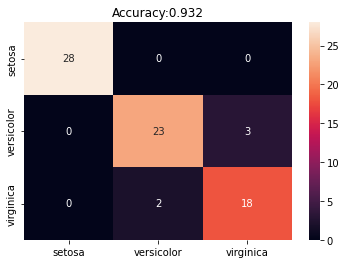

In [14]:
# Dtree
grid_params = { 
    'criterion':['gini','entropy'],
    'max_depth': np.arange(2, 100, 4)
}
gs_dtree = GridSearchCV(DecisionTreeClassifier(), grid_params, verbose=1, 
                        cv=5, n_jobs=-1)

gs_dtree_res = gs_dtree.fit(x_train,y_train)

#print(gs_dtree_res.best_score_)
#print(gs_dtree_res.best_estimator_)
#print(gs_dtree_res.best_params_)

y_pred_tree = gs_dtree_res.predict(x_test)
print(classification_report(y_test, y_pred_tree))

df_tree = pd.DataFrame(confusion_matrix(y_test, y_pred_tree),
                        index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])
sns.heatmap(df_tree, annot=True)
plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred_tree)))

In [15]:
# Preparing data for curves
dtree2 = DecisionTreeClassifier(**gs_dtree_res.best_params_)
knn2 = KNeighborsClassifier(**gs_knn_res.best_params_)

dtree2.fit(x_train, y_train)
knn2.fit(x_train, y_train)

resd = dtree2.predict_proba(x_test)
resk = knn2.predict_proba(x_test)

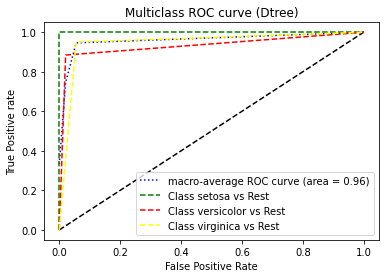

In [16]:
#ROC-curves
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, resd[:,i], pos_label=i)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="blue",
    linestyle=":",
)


plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class virginica vs Rest')

plt.title('Multiclass ROC curve (Dtree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

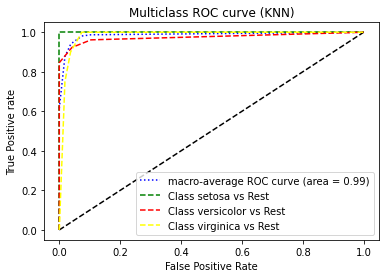

In [17]:
# roc for knn
knn2 = KNeighborsClassifier(**gs_knn_res.best_params_)
resk = knn2.predict_proba(x_test)
fpr = {}
tpr = {}
roc_auc = {}

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test, resk[:,i], pos_label=i)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(fpr["macro"], tpr["macro"], label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]), color="blue",linestyle=":",)    
plt.plot([0, 1], [0, 1], "k--")
plt.plot(fpr[0], tpr[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='yellow', label='Class virginica vs Rest')

plt.title('Multiclass ROC curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

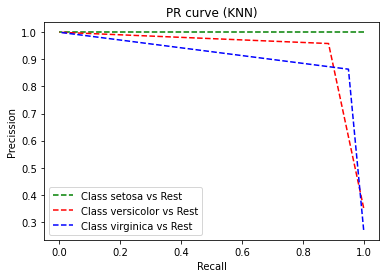

In [21]:
#PR-curves
p = {}
r = {}

for i in range(3):
    p[i], r[i], _ = precision_recall_curve(y_test, resd[:,i], pos_label=i)
    

plt.plot(r[0], p[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(r[2], p[2], linestyle='--',color='blue', label='Class virginica vs Rest')

plt.title('PR curve (KNN)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')
plt.legend(loc='best')

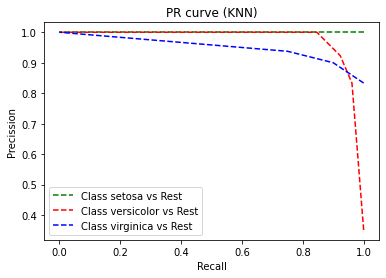

In [22]:
p = {}
r = {}

for i in range(3):
    p[i], r[i], _ = precision_recall_curve(y_test, resk[:,i], pos_label=i)

plt.plot(r[0], p[0], linestyle='--',color='green', label='Class setosa vs Rest')
plt.plot(r[1], p[1], linestyle='--',color='red', label='Class versicolor vs Rest')
plt.plot(r[2], p[2], linestyle='--',color='blue', label='Class virginica vs Rest')

plt.title('PR curve (KNN)')
plt.xlabel('Recall')
plt.ylabel('Precission')
plt.legend(loc='best')